# CIIC5015 - Introduction to Artificial Intelligence
## Project 3 - Convolutional Neural Networks
- Fernando J. Bermudez Medina
- 802-18-0426

Import the necesary libraries & Classes
- Matplotlib
- NumPy
- PyTorch
    - `Dataset` & `DataLoader` to pre-process data
    - `TorchVision` to normalize data
    - `TorchInfo` to view information about the neural networks defined 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
import torch.nn as nn

### Download & Load the MNIST Dataset

To fetch the data to use for training & testing, we will use the PyTorch's torchvision framework. In here we have a dataset that contains the MNIST Dataset and we can load it in the DataLoaders to split it into `batch_size` batches.

In [2]:
batch_size = 64

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

train_data_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_data_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=2)

classes = [i for i in range(10)]

100%|██████████| 9912422/9912422 [00:00<00:00, 424358866.67it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 92540636.99it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 116771205.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24175797.93it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Vizualize the data and its corresponding Tensor shapes

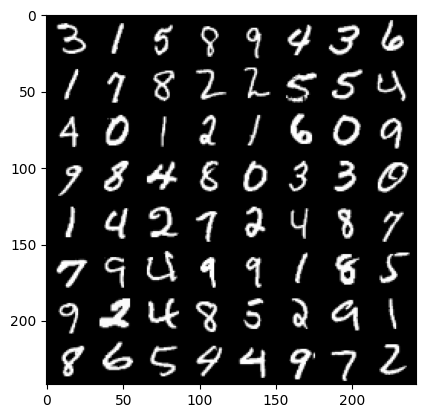

3 1 5 8 9 4 3 6 1 7 8 2 2 5 5 4 4 0 1 2 1 6 0 9 9 8 4 8 0 3 3 0 1 4 2 7 2 4 8 7 7 9 4 9 9 1 8 5 9 2 4 8 5 2 9 1 8 6 5 4 4 9 7 2
Images Batch Shape: torch.Size([64, 1, 28, 28])
Single Image Shape: torch.Size([1, 28, 28])
Flattened Single Image Shape: torch.Size([784])
Flattened Batch Shape: torch.Size([64, 784])


In [3]:
def show_image(image):
    image_array = image.numpy()
    plt.imshow(np.transpose(image_array, (1,2,0)))
    plt.show()
    
image_batch, label_batch = next(iter(train_data_loader))
show_image(torchvision.utils.make_grid(image_batch))
print(' '.join(f"{classes[label_batch[j]]}" for j in range(batch_size)))

print(f'Images Batch Shape: {image_batch.shape}') # (batch_size number of images, 1 color channel, 28 x 28 pixels)
print(f'Single Image Shape: {image_batch[0].shape}') # (1 color channel, 28 x 28 pixels)
print(f'Flattened Single Image Shape: {image_batch[0].view(-1).shape}') # (28 x 28 = 784 pixels)

flattened_batch = image_batch.view(-1, 784)

print(f"Flattened Batch Shape: {flattened_batch.shape}") # 4 tensors of 784 features (or pixels)

### Create Classification Neural Network Models

Using PyTorch's `nn.Conv2d`, `nn.Flatten`, `nn.MaxPool2d`, `nn.BatchNorm2d`, `nn.Linear` & `nn.ReLU` classes, we can create a classification  model that has one convolutional layer, a flattening layer, and 1 fully connnected layer. All of the layes have ReLU activation, except the output layer which has Softmax acitvation. We also create 3 extra models that contain more convolutional layers and the final 2 models have max pooling and batch normalization.

In [4]:
class ConvolutionalNeuralNetwork1(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork1, self).__init__() 

        self.convolutional_layer = nn.Conv2d(1, 16, 5, padding='same')
        self.activation_layer = nn.ReLU()

        self.flattening_layer = nn.Flatten()

        self.fully_connected_layer = nn.Linear(16 * 28 * 28, 10)

    def forward(self, x):
        x = self.convolutional_layer(x)
        x = self.activation_layer(x)
        x = self.flattening_layer(x)
        x = self.fully_connected_layer(x)
       
        return x

class ConvolutionalNeuralNetwork2(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork2, self).__init__() 

        self.convolutional_layer1 = nn.Conv2d(1, 6, 5, padding='same')
        self.activation_layer1 = nn.ReLU()

        self.convolutional_layer2 = nn.Conv2d(6, 16, 5, padding='same')
        self.activation_layer2 = nn.ReLU()

        self.flattening_layer = nn.Flatten()

        self.fully_connected_layer1 = nn.Linear(16 * 28 * 28, 84)
        self.activation_layer3 = nn.ReLU()

        self.fully_connected_layer2 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.convolutional_layer1(x)
        x = self.activation_layer1(x)
        x = self.convolutional_layer2(x)
        x = self.activation_layer2(x)
        x = self.flattening_layer(x)
        x = self.fully_connected_layer1(x)
        x = self.activation_layer3(x)
        x = self.fully_connected_layer2(x)
       
        return x

class ConvolutionalNeuralNetwork3(nn.Module):
    def __init__(self):
        super(ConvolutionalNeuralNetwork3, self).__init__()  

        self.convolutional_layer1 = nn.Conv2d(1, 6, 5, padding='same')
        self.activation_layer1 = nn.ReLU()
        self.max_pooling1 = nn.MaxPool2d(2)

        self.convolutional_layer2 = nn.Conv2d(6, 16, 5, padding='same')
        self.activation_layer2 = nn.ReLU()
        self.max_pooling2 = nn.MaxPool2d(2)

        self.flattening_layer = nn.Flatten()

        self.fully_connected_layer1 = nn.Linear(16 * 7 * 7, 120)
        self.activation_layer3 = nn.ReLU()

        self.fully_connected_layer2 = nn.Linear(120, 84)
        self.activation_layer4 = nn.ReLU()

        self.fully_connected_layer3 = nn.Linear(84, 10)

        self.batch_normalizer1 = nn.BatchNorm2d(6)
        self.batch_normalizer2 = nn.BatchNorm2d(16)

    def forward(self, x):
        x = self.convolutional_layer1(x)
        x = self.batch_normalizer1(x)
        x = self.activation_layer1(x)
        x = self.max_pooling1(x)
        x = self.convolutional_layer2(x)
        x = self.batch_normalizer2(x)
        x = self.activation_layer2(x)
        x = self.max_pooling2(x)
        x = self.flattening_layer(x)
        x = self.fully_connected_layer1(x)
        x = self.activation_layer3(x)
        x = self.fully_connected_layer2(x)
        x = self.activation_layer4(x)
        x = self.fully_connected_layer3(x)
       
        return x

class ConvolutionalNeuralNetwork4(nn.Module):

    def __init__(self):
        super(ConvolutionalNeuralNetwork4, self).__init__() 

        self.convolutional_layer1 = nn.Conv2d(1, 6, 3, padding='same')
        self.activation_layer1 = nn.ReLU()
        self.max_pooling1 = nn.MaxPool2d(2)

        self.convolutional_layer2 = nn.Conv2d(6, 32, 3, padding='same')
        self.activation_layer2 = nn.ReLU()
        self.max_pooling2 = nn.MaxPool2d(2)

        self.convolutional_layer3 = nn.Conv2d(32, 64, 3, padding='same')
        self.activation_layer3 = nn.ReLU()
        self.max_pooling3 = nn.MaxPool2d(2)

        self.flattening_layer = nn.Flatten()
        self.dropout_layer = nn.Dropout(0.10)

        self.fully_connected_layer1 = nn.Linear(int((36/49) * 28 * 28), 120)
        self.activation_layer4 = nn.ReLU()

        self.fully_connected_layer2 = nn.Linear(120, 84)
        self.activation_layer5 = nn.ReLU()

        self.fully_connected_layer3 = nn.Linear(84, 10)

        self.batch_normalizer1 = nn.BatchNorm2d(6)
        self.batch_normalizer2 = nn.BatchNorm2d(32)
        self.batch_normalizer3 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.convolutional_layer1(x)
        x = self.batch_normalizer1(x)
        x = self.activation_layer1(x)
        x = self.max_pooling1(x)
        x = self.convolutional_layer2(x)
        x = self.batch_normalizer2(x)
        x = self.activation_layer2(x)
        x = self.max_pooling2(x)
        x = self.convolutional_layer3(x)
        x = self.batch_normalizer3(x)
        x = self.activation_layer3(x)
        x = self.max_pooling3(x)
        x = self.flattening_layer(x)
        x = self.dropout_layer(x)
        x = self.fully_connected_layer1(x)
        x = self.activation_layer3(x)
        x = self.fully_connected_layer2(x)
        x = self.activation_layer4(x)
        x = self.fully_connected_layer3(x)
       
        return x


### Define Functions to Train, Compute Accuracy & Plot Loss Values

Once we define the model and its hyperparameters, we can define the loop used for training. 

The algorithm follows the following pseudocode:

```
for an n number of epochs, do the following:
    for each batch in train_loader:
        reset gradients to 0
        pass images & labels to devie being used (CPU or GPU)
        make a prediction (forward pass)
        compute loss value for that prediction
        back propagate error to all neurons (backward pass)
        adjust gradients based on error and back propagation
        compute average batch loss and store it for plotting
```

Now, we take the batch loss values collected from our training process to see if the loss converged (or plateaued) to a certain value in each model.

To do this, we define two functions to help us visualize the data better using `Matplotlib.pyplot`
- `plot_loss(loss_list, n)`:
    - The method takes as parameter the lists of batch loss values from a number of networks `n` and plots them. The x axis represents the epoch, the y value the average batch loss of the networks
- `accuracy(model, nn)`:
    - The method takes as parameter the network to test, a number indicating what network it is (1, 2, 3, 4) and computes how many predcitions it classified correctly.

In [5]:
def train_model(conv_nn, train_data_loader, device, epochs, learning_rate, network):
    print(f"Starting Convolutional Neural Network {network} Training")
    loss_list = []
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(conv_nn.parameters(), lr=learning_rate)
    size = len(train_data_loader.dataset)
    for epoch in range(epochs):
        running_loss = 0.0
        for index, data in enumerate(train_data_loader):
            input_images, label_images = data
            
            optimizer.zero_grad()

            input_images = input_images.to(device)
            label_images = label_images.to(device)
            
            predictions = conv_nn(input_images)
            loss = criterion(predictions, label_images)
            running_loss += loss.item()
                        
            loss.backward()
            optimizer.step()
            
            if (index + 1) % 937 == 0:
                print(f"Epoch: {epoch + 1} \t Average Batch Loss: {running_loss / 937:>7f}")
                loss_list.append(running_loss / 937)
    
    print(f"Finished Convolutional Neural Network {network} training")
    return loss_list 

In [6]:
def accuracy(conv_nn, device, test_data_loader):
    
    criterion = nn.CrossEntropyLoss()
    
    size = len(test_data_loader.dataset)
    num_batches = len(test_data_loader)
    test_loss, correct = 0, 0
    
    with torch.no_grad():
        for images, labels in test_data_loader:
            images = images.to(device)
            labels = labels.to(device)
            predictions  = conv_nn(images)
            test_loss += criterion(predictions, labels).item()
            correct += (predictions.argmax(1) == labels).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    
    print(f"Accuracy: {100 * correct:>0.1f}%, Avergae Loss: {test_loss:>7f}") 
    
def plot_loss(loss_list, nn):
    plt.plot(loss_list, 'r' if nn == 1 else 'b' if nn == 2 else 'y' if nn == 3 else 'g', label=f"Neural Network {nn}") # Plot the loss function in red color

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, color='grey')
    plt.show()



### Set up device to use to make computations

Since CNN take more than ususal to train due to the intense amount of computations it needs to make, we allow the networks to use an external GPU (if available) to make said calcutations to speed up the training process.

In [7]:
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
torch.device(device)
print(f"Using device: {device}")
epochs = 20
learning_rate = 0.01

Using device: cuda


### Train Neural Network Models

In [8]:
conv_nn1 = ConvolutionalNeuralNetwork1()
conv_nn1.to(device)

loss_list1 = train_model(conv_nn1, train_data_loader, device, epochs, learning_rate, 1)

Starting Convolutional Neural Network 1 Training
Epoch: 1 	 Average Batch Loss: 0.162632
Epoch: 2 	 Average Batch Loss: 0.066737
Epoch: 3 	 Average Batch Loss: 0.053258
Epoch: 4 	 Average Batch Loss: 0.043413
Epoch: 5 	 Average Batch Loss: 0.035532
Epoch: 6 	 Average Batch Loss: 0.028109
Epoch: 7 	 Average Batch Loss: 0.026206
Epoch: 8 	 Average Batch Loss: 0.023260
Epoch: 9 	 Average Batch Loss: 0.019981
Epoch: 10 	 Average Batch Loss: 0.018606
Epoch: 11 	 Average Batch Loss: 0.021169
Epoch: 12 	 Average Batch Loss: 0.019260
Epoch: 13 	 Average Batch Loss: 0.022760
Epoch: 14 	 Average Batch Loss: 0.013096
Epoch: 15 	 Average Batch Loss: 0.022852
Epoch: 16 	 Average Batch Loss: 0.017340
Epoch: 17 	 Average Batch Loss: 0.015600
Epoch: 18 	 Average Batch Loss: 0.013986
Epoch: 19 	 Average Batch Loss: 0.018446
Epoch: 20 	 Average Batch Loss: 0.017354
Finished Convolutional Neural Network 1 training


In [9]:
conv_nn2 = ConvolutionalNeuralNetwork2()
conv_nn2.to(device)

loss_list2 = train_model(conv_nn2, train_data_loader, device, epochs, learning_rate, 2)

Starting Convolutional Neural Network 2 Training
Epoch: 1 	 Average Batch Loss: 0.186516
Epoch: 2 	 Average Batch Loss: 0.089377
Epoch: 3 	 Average Batch Loss: 0.073207
Epoch: 4 	 Average Batch Loss: 0.072032
Epoch: 5 	 Average Batch Loss: 0.059649
Epoch: 6 	 Average Batch Loss: 0.056126
Epoch: 7 	 Average Batch Loss: 0.048696
Epoch: 8 	 Average Batch Loss: 0.045239
Epoch: 9 	 Average Batch Loss: 0.049689
Epoch: 10 	 Average Batch Loss: 0.046849
Epoch: 11 	 Average Batch Loss: 0.047216
Epoch: 12 	 Average Batch Loss: 0.041438
Epoch: 13 	 Average Batch Loss: 0.041021
Epoch: 14 	 Average Batch Loss: 0.045646
Epoch: 15 	 Average Batch Loss: 0.037902
Epoch: 16 	 Average Batch Loss: 0.042798
Epoch: 17 	 Average Batch Loss: 0.039068
Epoch: 18 	 Average Batch Loss: 0.038943
Epoch: 19 	 Average Batch Loss: 0.044787
Epoch: 20 	 Average Batch Loss: 0.040566
Finished Convolutional Neural Network 2 training


In [10]:
conv_nn3 = ConvolutionalNeuralNetwork3()
conv_nn3.to(device)

loss_list3 = train_model(conv_nn3, train_data_loader, device, epochs, learning_rate, 3)

Starting Convolutional Neural Network 3 Training
Epoch: 1 	 Average Batch Loss: 0.151186
Epoch: 2 	 Average Batch Loss: 0.064259
Epoch: 3 	 Average Batch Loss: 0.054278
Epoch: 4 	 Average Batch Loss: 0.052408
Epoch: 5 	 Average Batch Loss: 0.042238
Epoch: 6 	 Average Batch Loss: 0.040478
Epoch: 7 	 Average Batch Loss: 0.041141
Epoch: 8 	 Average Batch Loss: 0.036290
Epoch: 9 	 Average Batch Loss: 0.038445
Epoch: 10 	 Average Batch Loss: 0.030856
Epoch: 11 	 Average Batch Loss: 0.029371
Epoch: 12 	 Average Batch Loss: 0.033698
Epoch: 13 	 Average Batch Loss: 0.025990
Epoch: 14 	 Average Batch Loss: 0.028167
Epoch: 15 	 Average Batch Loss: 0.024657
Epoch: 16 	 Average Batch Loss: 0.023207
Epoch: 17 	 Average Batch Loss: 0.028747
Epoch: 18 	 Average Batch Loss: 0.032075
Epoch: 19 	 Average Batch Loss: 0.018513
Epoch: 20 	 Average Batch Loss: 0.024918
Finished Convolutional Neural Network 3 training


### Bonus: Resize Images & Use Dropout

To avoid overfitting and to avoid the image becoming too small very quickly, we create a new dataset that rezises images from 28x28 to 224x224 using torchvision's `transforms.Compose` class. This is so we can add more convolutions and more pooling in our model. We create a new network that uses the same layout as model 3, but has one extra convolution and uses droput to prevent overfitting. This model will use this rezised dataset to compare results with the other 3 networks

In [11]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224), antialias=None)
])

train_set_bonus = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set_bonus = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data_loader_bonus = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_data_loader_bonus = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=2)


In [12]:
conv_nn4 = ConvolutionalNeuralNetwork4()
conv_nn4.to(device)

loss_list4 = train_model(conv_nn4, train_data_loader_bonus, device, epochs, learning_rate, 4)

Starting Convolutional Neural Network 4 Training
Epoch: 1 	 Average Batch Loss: 0.196327
Epoch: 2 	 Average Batch Loss: 0.070171
Epoch: 3 	 Average Batch Loss: 0.058106
Epoch: 4 	 Average Batch Loss: 0.054175
Epoch: 5 	 Average Batch Loss: 0.049394
Epoch: 6 	 Average Batch Loss: 0.047460
Epoch: 7 	 Average Batch Loss: 0.039367
Epoch: 8 	 Average Batch Loss: 0.040877
Epoch: 9 	 Average Batch Loss: 0.038944
Epoch: 10 	 Average Batch Loss: 0.035429
Epoch: 11 	 Average Batch Loss: 0.034220
Epoch: 12 	 Average Batch Loss: 0.032291
Epoch: 13 	 Average Batch Loss: 0.034742
Epoch: 14 	 Average Batch Loss: 0.036989
Epoch: 15 	 Average Batch Loss: 0.032311
Epoch: 16 	 Average Batch Loss: 0.029204
Epoch: 17 	 Average Batch Loss: 0.026994
Epoch: 18 	 Average Batch Loss: 0.027672
Epoch: 19 	 Average Batch Loss: 0.028447
Epoch: 20 	 Average Batch Loss: 0.027991
Finished Convolutional Neural Network 4 training


### Test Model Accuracy & Plot Loss Values

Accuracy: 97.4%, Avergae Loss: 0.408575


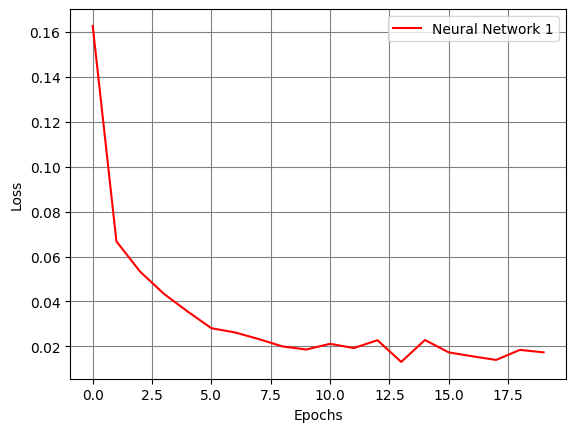

Accuracy: 97.6%, Avergae Loss: 0.267977


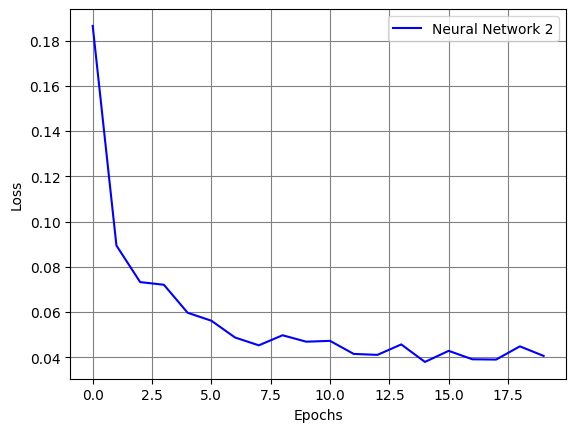

Accuracy: 98.9%, Avergae Loss: 0.065548


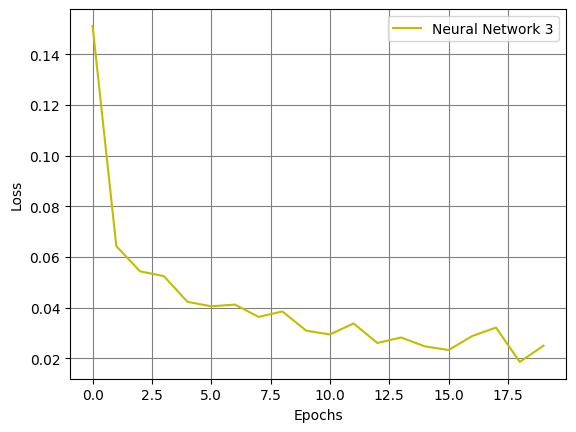

Accuracy: 98.9%, Avergae Loss: 0.059123


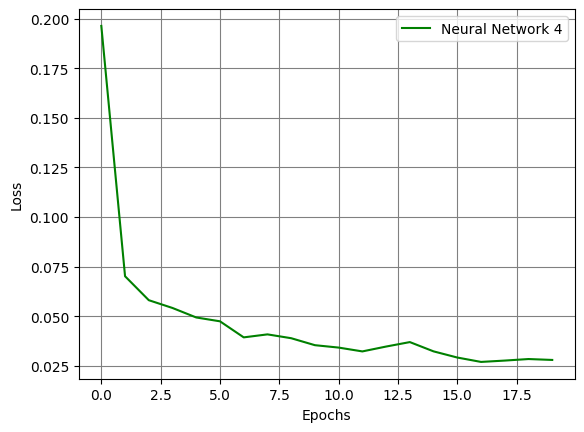

In [13]:
accuracy(conv_nn1, device, test_data_loader)
plot_loss(loss_list1, 1)

accuracy(conv_nn2, device, test_data_loader)
plot_loss(loss_list2, 2)

accuracy(conv_nn3, device, test_data_loader)
plot_loss(loss_list3, 3)

accuracy(conv_nn4, device, test_data_loader_bonus)
plot_loss(loss_list4, 4)

### Conclusions

Following the process done in this notebook, we can answer the following two questions:

1. Which of the four models had the least amount of error for validation? 
    - From the four models, we can see that each model only has a minimal difference in accuracy, and all 4 models have the same loss values and they converge almost to the same value. The only model that stands out in terms of accuracy is model 1 since it always contains a constant value of around 90-95%, but a fraction larger than the other models. In conclusion, by saying that model 3/4 is the one with the least amount of error for validation, but we can't say that we don't necessarily need many convolutions to reduce the margin of error since it is a small difference from the rest.
2. How long it took to train each model? 
    - Each model takes around 3-4 minutes using a GPU in Google Colab to train since it is processing 600 images per batch using convolutions. Without a GPU each model takes on average about 20 minutes to train. This time worsens if we add more convolutions to the model.